In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# I'll use this later to draw the memberships of the groups 
import matplotlib.colors as colormaps

# Segmentation using contours
Contours finds the lines around objects.  For images where thresholding is able to seperate objects from background, 
but not seperate objects into seperate parts, this is a good approach

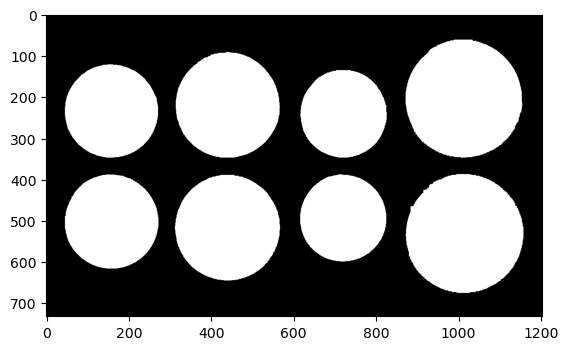

In [2]:
# Let's use the coin2 image for this
im = cv2.imread(os.path.relpath('../../Data/Coins2.png'), cv2.IMREAD_COLOR)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

# First, we need to start off with a threshold that seperates the objects and background 
im_gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

_,thres = cv2.threshold(im_gray,np.mean(im_gray),255,cv2.THRESH_BINARY_INV)

# Let's close the image up a bit
kernel = np.ones((3,3),np.uint8)
thres = cv2.morphologyEx(thres,cv2.MORPH_CLOSE,kernel,iterations=5)

plt.imshow(thres,cmap='gray')

In [1]:
# Now, let's find the contours around the images
contours,hierarchy = cv2.findContours(thres,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# Contours is an array of an array of points defining lines in the image
print("The number of contours identified is:",len(contours))

# We should have found 8 contours (one per coin)

# Now let's sort the contours based on the size of the area they enclose
sorted_contour = sorted(contours,key=cv2.contourArea)  # smallest to largest

mask = np.zeros([im.shape[0],im.shape[1]],dtype='uint8')

mask=cv2.drawContours(mask,sorted_contour,-1,1,-1) # The 3rd entry is the index of the contour to use, -1 means all
                                                   # the 4th entry is the color to use. SInce this is a mask, just use 1
                                                   # the 5th entry is the linewidth. -1 will fill in the contour 

im_masked = cv2.bitwise_and(im,im,mask=mask)

color = ['#641E16','b','g','r','c','m','y','#E67E22']

# Lets draw the lines around each coin
for idx in range(0,len(sorted_contour)):
    linewidth=5
    c=tuple(255*np.array(colormaps.to_rgb(color[idx]))) 
    im_masked=cv2.drawContours(im_masked,sorted_contour,idx,c,linewidth)

area=np.zeros((len(sorted_contour)))
for i in range(0,len(sorted_contour)):
    area[i]=cv2.contourArea(sorted_contour[i])



NameError: name 'cv2' is not defined

Text(0.5, 1.0, 'Segmented')

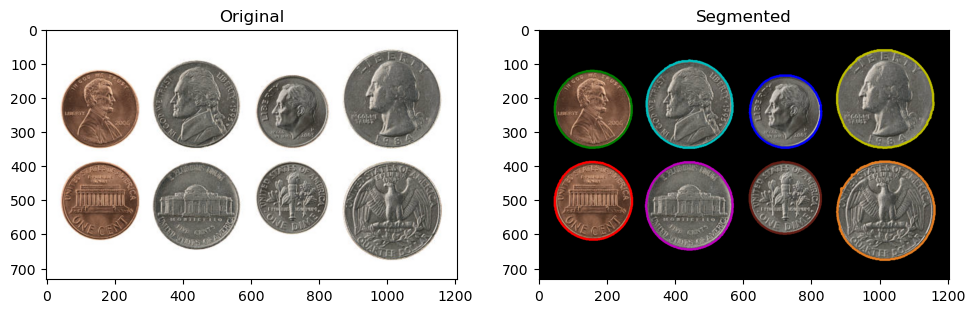

In [4]:
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(im);  plt.title("Original")
plt.subplot(132);plt.imshow(im_masked);  plt.title("Segmented")


In [5]:
# Since the coins can be identified by size, we can also label them

area=np.zeros((len(sorted_contour)))
for i in range(0,len(sorted_contour)):
    area[i]=cv2.contourArea(sorted_contour[i])
area=np.float32(area) # K-means needs floats

# Use K-means and we know there are 4 types of coins
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
compactness,label,center=cv2.kmeans(area,4,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Since the initialization of K-means is random, the clusters will not be in any particular order
sizeord=np.argsort(center,axis=0) # Find the order from smallest to largest


# Dimes are the smallest
mask_dime = np.zeros([im.shape[0],im.shape[1]],dtype='uint8')
for id in np.where(label==sizeord[0])[0]:
    mask_dime=cv2.drawContours(mask_dime,sorted_contour,id,1,-1) 
im_masked_dime = cv2.bitwise_and(im,im,mask=mask_dime)

mask_penny = np.zeros([im.shape[0],im.shape[1]],dtype='uint8')
for id in np.where(label==sizeord[1])[0]:
    mask_penny=cv2.drawContours(mask_penny,sorted_contour,id,1,-1) 
im_masked_penny = cv2.bitwise_and(im,im,mask=mask_penny)

mask_nickels = np.zeros([im.shape[0],im.shape[1]],dtype='uint8')
for id in np.where(label==sizeord[2])[0]:
    mask_nickels=cv2.drawContours(mask_nickels,sorted_contour,id,1,-1) 
im_masked_nickels = cv2.bitwise_and(im,im,mask=mask_nickels)

mask_qrt = np.zeros([im.shape[0],im.shape[1]],dtype='uint8')
for id in np.where(label==sizeord[3])[0]:
    mask_qrt=cv2.drawContours(mask_qrt,sorted_contour,id,1,-1) 
im_masked_qrt = cv2.bitwise_and(im,im,mask=mask_qrt)


Text(0.5, 1.0, 'Quarters')

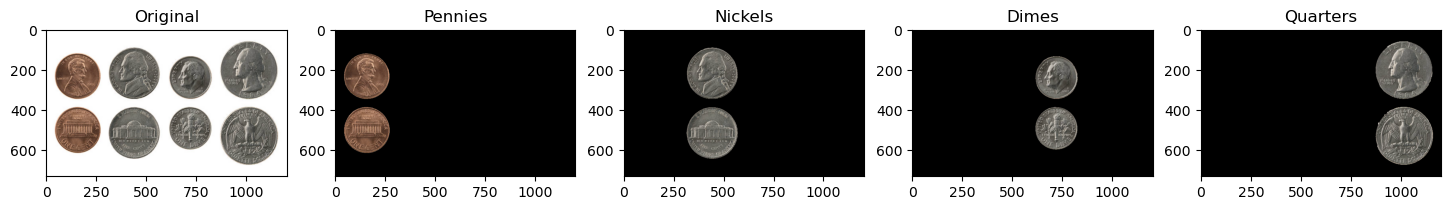

In [6]:
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(151);plt.imshow(im);  plt.title("Original")
plt.subplot(152);plt.imshow(im_masked_penny);  plt.title("Pennies")
plt.subplot(153);plt.imshow(im_masked_nickels);  plt.title("Nickels")
plt.subplot(154);plt.imshow(im_masked_dime);  plt.title("Dimes")
plt.subplot(155);plt.imshow(im_masked_qrt);  plt.title("Quarters")
